In [1]:
import os
import pandas as pd

#defuine folder path containing the CSV files
folder_path = r"C:\Users\matts\Documents\Empirical Project\EmpiricalProject-720005462\PlayerData"

#empty ist to store dfs
dfs = []

#for loop to iterate over each file
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        
        #read the CSV file into a df
        #encode with latin-1 
        df = pd.read_csv(file_path, encoding='latin-1')
        
        #append df to list
        dfs.append(df)

#merge df
merged_df = pd.concat(dfs, ignore_index=True)

print(merged_df)

           Player Name     Position  Nationality                 Club  Height  \
0          Gary Ablett     Defender      England              Everton   188cm   
1           Tony Adams     Defender      England              Arsenal   191cm   
2          Steve Agnew   Midfielder      England     Blackburn Rovers   178cm   
3          Derek Allan     Defender     Scotland          Southampton   183cm   
4        Bradley Allen      Forward      England  Queens Park Rangers   170cm   
...                ...          ...          ...                  ...     ...   
3180      Ben Woodburn   Midfielder        Wales            Liverpool   174cm   
3181   Freddie Woodman   Goalkeeper      England  Bournemouth  (Loan)   188cm   
3182  Joe Wormleighton     Defender      England       Leicester City           
3183       Joe Worrall     Defender      England    Nottingham Forest   193cm   
3184      James Wright   Goalkeeper      England          Aston Villa           

                    DoB  Go

In [2]:
import numpy as np

#strips any leading whitespace
#fixed in web scrape code now but due to time taken to generate data white space has been stripped
merged_df = merged_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
merged_df.columns = [column.strip() for column in merged_df.columns]

#keeps only birth date
merged_df['DoB'] = merged_df['DoB'].str.slice(0, 10)

#replaces any empty value with a NaN
merged_df.replace('', np.nan, inplace=True)

print(merged_df)

           Player Name    Position Nationality                 Club Height  \
0          Gary Ablett    Defender     England              Everton  188cm   
1           Tony Adams    Defender     England              Arsenal  191cm   
2          Steve Agnew  Midfielder     England     Blackburn Rovers  178cm   
3          Derek Allan    Defender    Scotland          Southampton  183cm   
4        Bradley Allen     Forward     England  Queens Park Rangers  170cm   
...                ...         ...         ...                  ...    ...   
3180      Ben Woodburn  Midfielder       Wales            Liverpool  174cm   
3181   Freddie Woodman  Goalkeeper     England  Bournemouth  (Loan)  188cm   
3182  Joe Wormleighton    Defender     England       Leicester City    NaN   
3183       Joe Worrall    Defender     England    Nottingham Forest  193cm   
3184      James Wright  Goalkeeper     England          Aston Villa    NaN   

             DoB Goals   Season Season.1  
0     19/11/1965    

C:\Users\matts\AppData\Local\Temp\ipykernel_7844\2042184854.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [3]:
#counts the number of rows with null values
num_rows_with_null = merged_df.isnull().any(axis=1).sum()
print("Number of rows with null values:", num_rows_with_null)


#counts the number of rows with null values excluding the 'height' column
merged_df_temp = merged_df.drop(columns=['Height'])
num_rows_with_null = merged_df_temp.isnull().any(axis=1).sum()
print("Number of rows with null values (excluding 'Height' column):", num_rows_with_null)


#drops rows with NaN values in any column except 'height'
merged_df = merged_df.dropna(subset=[col for col in merged_df.columns if col != 'Height'])
print(merged_df)

Number of rows with null values: 238
Number of rows with null values (excluding 'Height' column): 15
           Player Name    Position Nationality                 Club Height  \
0          Gary Ablett    Defender     England              Everton  188cm   
1           Tony Adams    Defender     England              Arsenal  191cm   
2          Steve Agnew  Midfielder     England     Blackburn Rovers  178cm   
3          Derek Allan    Defender    Scotland          Southampton  183cm   
4        Bradley Allen     Forward     England  Queens Park Rangers  170cm   
...                ...         ...         ...                  ...    ...   
3180      Ben Woodburn  Midfielder       Wales            Liverpool  174cm   
3181   Freddie Woodman  Goalkeeper     England  Bournemouth  (Loan)  188cm   
3182  Joe Wormleighton    Defender     England       Leicester City    NaN   
3183       Joe Worrall    Defender     England    Nottingham Forest  193cm   
3184      James Wright  Goalkeeper     En

In [4]:
#group the df by 'Season' and count the number of unique nationalities for each season
unique_countries_per_season = merged_df.groupby('Season')['Nationality'].nunique().reset_index()

#rename columns
unique_countries_per_season.columns = ['Season', 'Unique Countries']

print(unique_countries_per_season)

    Season  Unique Countries
0  1992/93                28
1  2002/03                77
2  2012/13                87
3  2022/23                84


In [5]:
#get the unique seasons in the df
unique_seasons = merged_df['Season'].unique()

#create an empty dictionary to store dfs for each season
season_dataframes = {}

#for loop to iterate over each season
for season in unique_seasons:
    #filter df for the current season
    season_df = merged_df[merged_df['Season'] == season]
    
    #calculate the total number of rows for each unique nationality
    nationality_counts = season_df['Nationality'].value_counts()
    
    #create a df from the value counts
    nationality_counts_df = pd.DataFrame({'Nationality': nationality_counts.index, 'No. Players': nationality_counts.values})

    #rank based on number of players for each nation
    nationality_counts_df = nationality_counts_df.sort_values(by='No. Players', ascending=False)
    nationality_counts_df['Rank'] = nationality_counts_df['No. Players'].rank(method='dense', ascending=False)
    nationality_counts_df['Rank'] = nationality_counts_df['Rank'].astype(int)

    #calculate the percentage of players for each nationality
    total_players = nationality_counts_df['No. Players'].sum()
    nationality_counts_df['Percentage'] = (nationality_counts_df['No. Players'] / total_players) * 100
    
    #store the df for the current season in the dictionary
    season_dataframes[season] = nationality_counts_df

#print dfs
for season, df in season_dataframes.items():
    print(f"Season: {season}")
    print(df)
    print(df.columns)

Season: 1992/93
         Nationality  No. Players  Rank  Percentage
0            England          388     1   71.062271
1           Scotland           39     2    7.142857
2            Ireland           26     3    4.761905
3              Wales           26     3    4.761905
4   Northern Ireland           13     4    2.380952
5             Norway            8     5    1.465201
6            Denmark            5     6    0.915751
7        Netherlands            4     7    0.732601
8          Australia            4     7    0.732601
9            Jamaica            3     8    0.549451
10     United States            3     8    0.549451
11            Canada            3     8    0.549451
12            Sweden            3     8    0.549451
16           Germany            2     9    0.366300
18            Poland            2     9    0.366300
17            Russia            2     9    0.366300
14          Zimbabwe            2     9    0.366300
15           Iceland            2     9    0.366

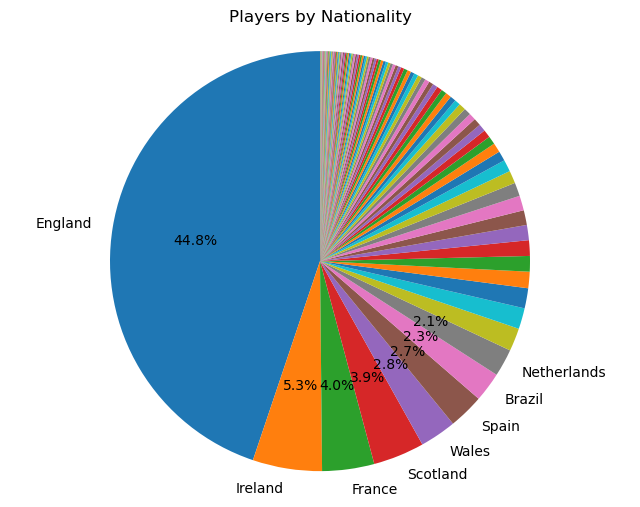

In [6]:
import matplotlib.pyplot as plt

# Calculate the count of players for each nationality
nationality_counts = merged_df['Nationality'].value_counts()

# Calculate total number of players to find percentages
total_players = nationality_counts.sum()

# Calculate percentages
percentages = (nationality_counts / total_players) * 100

# Define labels based on percentage 
labels = [index if percent > 2 else '' for index, percent in percentages.items()]

plt.figure(figsize=(8, 6))
plt.pie(nationality_counts, labels=labels, autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 2 else '', startangle=90)
plt.title('Players by Nationality')
plt.axis('equal')  
plt.show()

  Nationality  No. Players  Rank  Percentage
5      Norway            8     5    1.465201


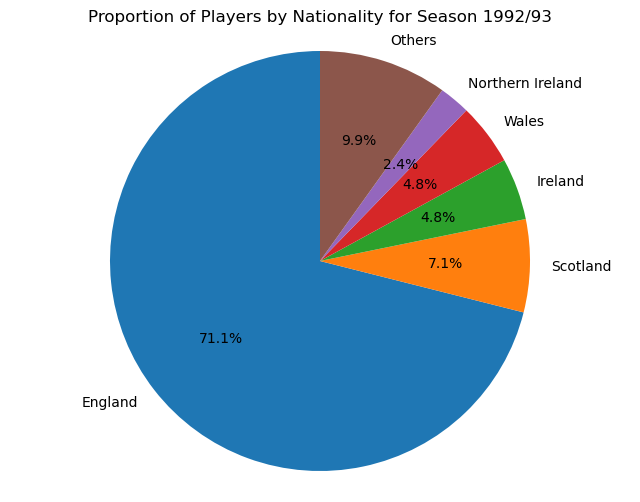

         Nationality  No. Players  Rank  Percentage
10  Northern Ireland           11     9    1.470588
11           Finland           10    10    1.336898
12             Italy            9    11    1.203209
13           Germany            9    11    1.203209
14           Iceland            8    12    1.069519
15         Argentina            8    12    1.069519
16             Spain            7    13    0.935829
17           Nigeria            7    13    0.935829
18           Jamaica            7    13    0.935829
21            Brazil            6    14    0.802139
22          Portugal            6    14    0.802139
20          Cameroon            6    14    0.802139
19     United States            6    14    0.802139


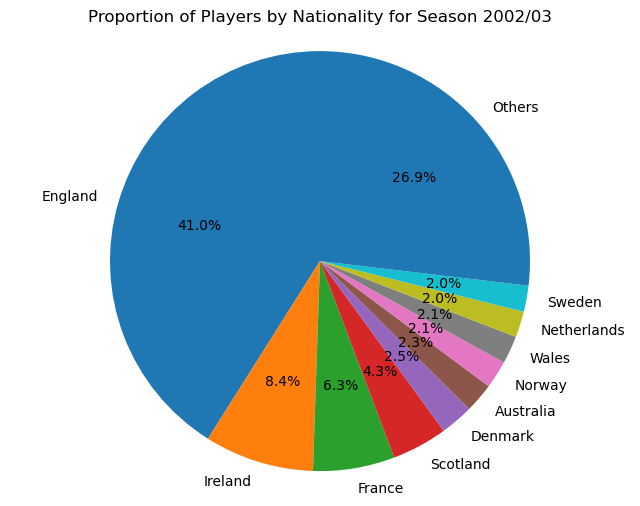

         Nationality  No. Players  Rank  Percentage
9   Northern Ireland           13     8    1.604938
11           Germany           13     8    1.604938
10         Argentina           13     8    1.604938
12          Portugal           12     9    1.481481
13         Australia           12     9    1.481481
14           Jamaica           10    10    1.234568
15     United States            9    11    1.111111
16     Cote DIvoire            9    11    1.111111
17             Italy            9    11    1.111111
19       Switzerland            8    12    0.987654
20              Mali            8    12    0.987654
18           Senegal            8    12    0.987654
21            Norway            7    13    0.864198
22            Sweden            6    14    0.740741
23    Czech Republic            6    14    0.740741
24          Cameroon            6    14    0.740741
25           Nigeria            6    14    0.740741
26          Slovakia            6    14    0.740741
27          

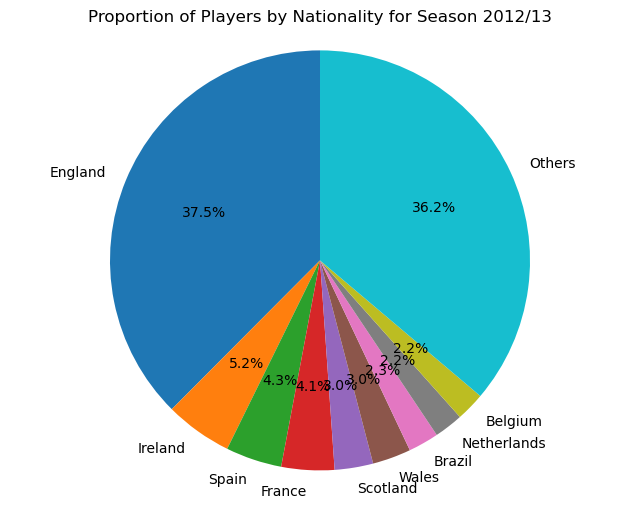

         Nationality  No. Players  Rank  Percentage
9            Denmark           21     8    1.969981
11     United States           18     9    1.688555
10           Belgium           18     9    1.688555
12           Germany           16    10    1.500938
13         Argentina           15    11    1.407129
14            Poland           15    11    1.407129
15  Northern Ireland           12    12    1.125704
16             Ghana           11    13    1.031895
17             Italy           11    13    1.031895
18           Jamaica           11    13    1.031895
22           Nigeria            9    14    0.844278
21     Cote DIvoire            9    14    0.844278
20          Colombia            9    14    0.844278
19            Sweden            9    14    0.844278
23       Switzerland            7    15    0.656660
24            Norway            7    15    0.656660
25           Senegal            7    15    0.656660
26           Uruguay            6    16    0.562852
27    Czech 

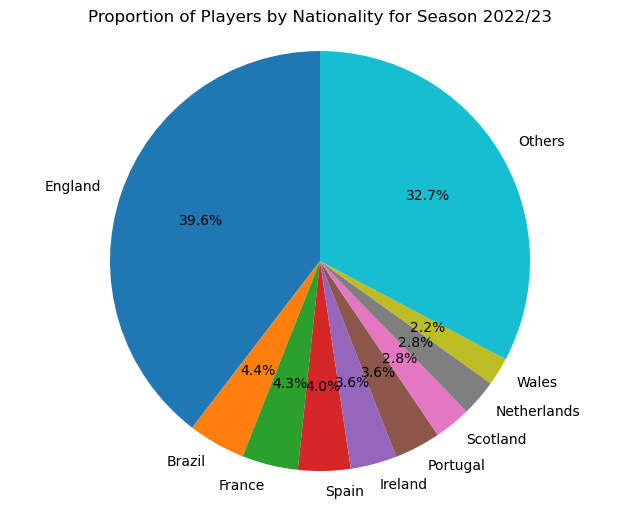

In [7]:
#for loop iterates over all seasons
for season, df in season_dataframes.items():

    #calculate the total number of players
    total_players = df['No. Players'].sum()

    #identify nationalities that make up less than 2% of the total
    mask = df['Percentage'] < 2

    #create a new df for nationalities under the threshold
    others = df[mask]

    #sum the 'Others' category
    others_sum = others['No. Players'].sum()

    #remove the countries that are less than 2% from the original DataFrame
    filtered_nationalities = df[~mask]

    #append the 'Others' row to the end of the df
    new_row = pd.DataFrame({'Nationality': ['Others'], 'No. Players': [others_sum], 'Proportion': [(others_sum / total_players) * 100]})
    filtered_nationalities = pd.concat([filtered_nationalities, new_row], ignore_index=True)

    #print rows of 'Others' where 'No. Players' is greater than 5
    filtered_others_df = others[others['No. Players'] > 5]
    print(filtered_others_df)

    #plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(filtered_nationalities['No. Players'], labels=filtered_nationalities['Nationality'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of Players by Nationality for Season {season}')
    plt.axis('equal')  
    plt.show()

In [9]:
#dictionary to store dfs for each season
season_dfs = {}

#for loop to terate over each season
for season, df_season in merged_df.groupby('Season'):
    #create a new DataFrame with 'position', 'season', and 'club'
    new_df = df_season[['Position', 'Season', 'Club']].copy()
    
    #remove '(loan)', 'U18', and 'U21' from club names at the end of the string after stripping whitespace
    new_df['Club'] = new_df['Club'].str.replace(r'\s*(\(Loan\)|U18|U21)\s*', '', regex=True)

    
    #group by 'Club', and 'Position'
    grouped_df = new_df.groupby(['Club', 'Position']).size().reset_index(name='Count')
    
    #pivot the df so that clubs are rows and positions are columns
    pivot_df = grouped_df.pivot_table(index='Club', columns='Position', values='Count', aggfunc='sum', fill_value=0)
    
    #add a total column
    pivot_df['Total Sqaud'] = pivot_df.sum(axis=1)

    #add proportion columns
    pivot_df['Proportion Defender'] = (pivot_df['Defender'] / pivot_df['Total Sqaud']) * 100
    pivot_df['Proportion Forward'] = (pivot_df['Forward'] / pivot_df['Total Sqaud']) * 100
    pivot_df['Proportion Goalkeeper'] = (pivot_df['Goalkeeper'] / pivot_df['Total Sqaud']) * 100
    pivot_df['Proportion Midfielder'] = (pivot_df['Midfielder'] / pivot_df['Total Sqaud']) * 100
    
    #store the dataset for the current season
    season_dfs[season] = pivot_df

#print each df
for season, dataset in season_dfs.items():
    print(f"Dataset for {season}:")
    print(dataset)
    print("\n")

Dataset for 1992/93:
Position             Defender  Forward  Goalkeeper  Midfielder  Total Sqaud  \
Club                                                                          
Arsenal                    12        5           2          10           29   
Aston Villa                 8        6           3          12           29   
Blackburn Rovers            8        5           3          11           27   
Chelsea                    12        7           6           9           34   
Coventry City               9        6           2           8           25   
Crystal Palace              5        5           4          12           26   
Everton                    12        5           2           7           26   
Ipswich Town                6        3           3          10           22   
Leeds United               11        4           4           9           28   
Liverpool                   6        4           3           9           22   
Manchester City             7  

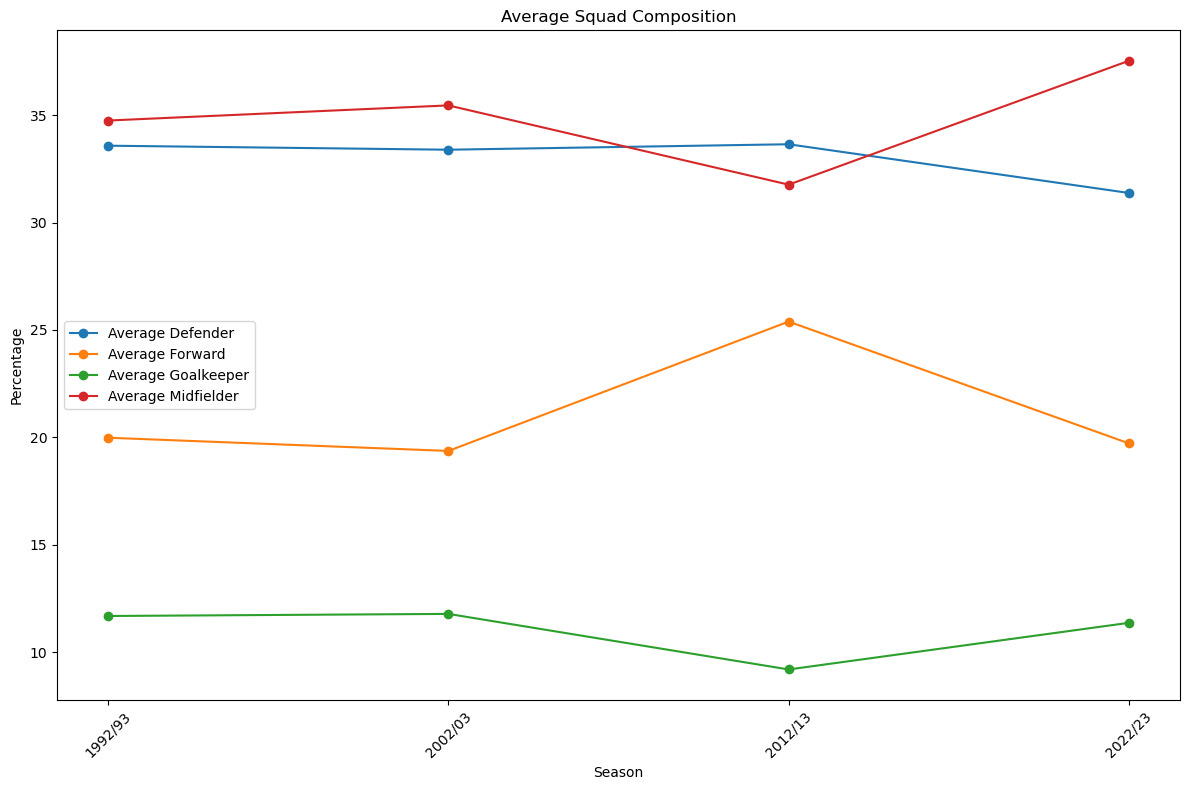

In [21]:
import matplotlib.pyplot as plt

# Initialize lists to store average, min, and max data
avg_data = []

# Iterate over each season dataframe and calculate average, min, and max squad composition
for season, df in season_dfs.items():
    avg_data.append(df.mean())

# Convert lists to DataFrames
avg_df = pd.DataFrame(avg_data, index=season_dfs.keys())

# Plot average, min, and max squad composition
plt.figure(figsize=(12, 8))

# Plot average
plt.plot(avg_df.index, avg_df['Proportion Defender'], label='Average Defender', marker='o')
plt.plot(avg_df.index, avg_df['Proportion Forward'], label='Average Forward', marker='o')
plt.plot(avg_df.index, avg_df['Proportion Goalkeeper'], label='Average Goalkeeper', marker='o')
plt.plot(avg_df.index, avg_df['Proportion Midfielder'], label='Average Midfielder', marker='o')

# Add labels and legend
plt.title('Average Squad Composition')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

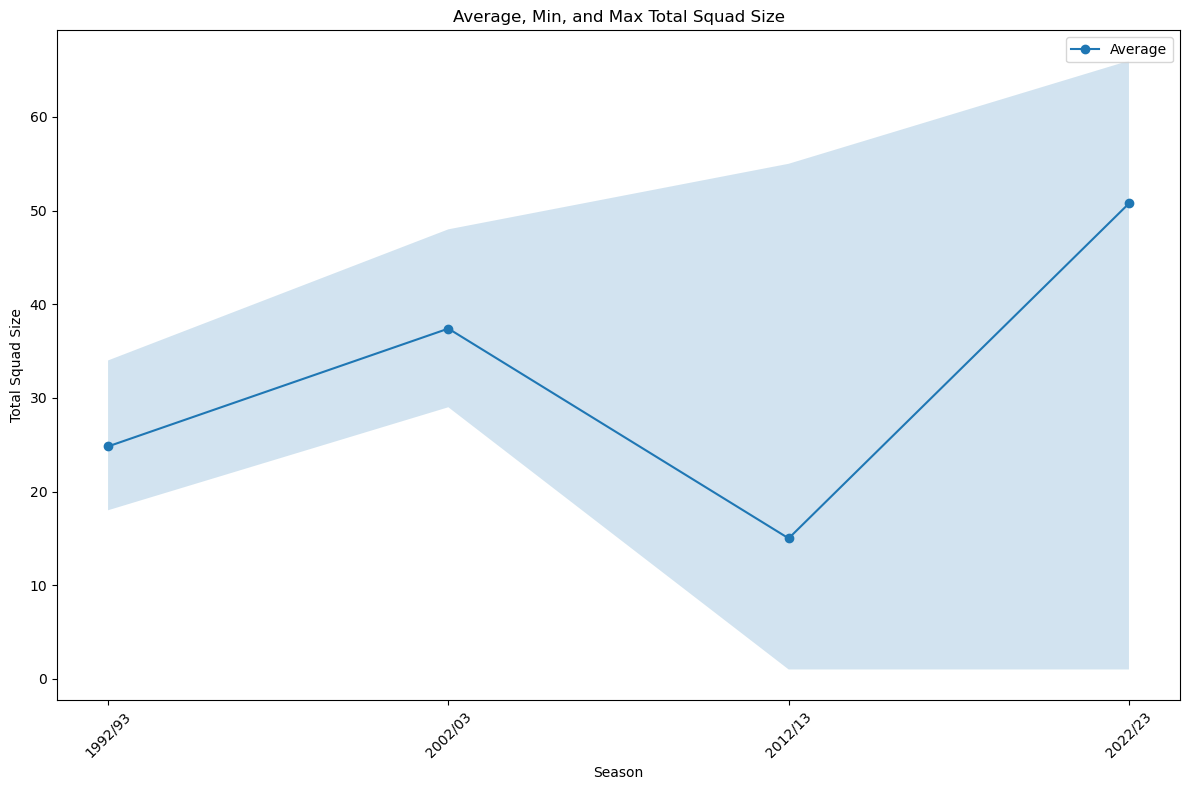

In [22]:
import matplotlib.pyplot as plt

# Initialize lists to store average, min, and max total squad size
avg_total = []
min_total = []
max_total = []

# Iterate over each season dataframe and calculate average, min, and max total squad size
for season, df in season_dfs.items():
    avg_total.append(df['Total Sqaud'].mean())
    min_total.append(df['Total Sqaud'].min())
    max_total.append(df['Total Sqaud'].max())

# Plot average, min, and max total squad size
plt.figure(figsize=(12, 8))

# Plot average
plt.plot(season_dfs.keys(), avg_total, label='Average', marker='o')

# Plot min and max
plt.fill_between(season_dfs.keys(), min_total, max_total, alpha=0.2)

# Add labels and legend
plt.title('Average, Min, and Max Total Squad Size')
plt.xlabel('Season')
plt.ylabel('Total Squad Size')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
#strip "cm" from all values in the "Height" column
merged_df['Height'] = merged_df['Height'].str.replace('cm', '')

#convert the "Height" column to numeric
#merged_df['Height'] = pd.to_numeric(merged_df['Height'])

print(merged_df)

           Player Name    Position Nationality                 Club Height  \
0          Gary Ablett    Defender     England              Everton    188   
1           Tony Adams    Defender     England              Arsenal    191   
2          Steve Agnew  Midfielder     England     Blackburn Rovers    178   
3          Derek Allan    Defender    Scotland          Southampton    183   
4        Bradley Allen     Forward     England  Queens Park Rangers    170   
...                ...         ...         ...                  ...    ...   
3180      Ben Woodburn  Midfielder       Wales            Liverpool    174   
3181   Freddie Woodman  Goalkeeper     England  Bournemouth  (Loan)    188   
3182  Joe Wormleighton    Defender     England       Leicester City    NaN   
3183       Joe Worrall    Defender     England    Nottingham Forest    193   
3184      James Wright  Goalkeeper     England          Aston Villa    NaN   

             DoB Goals   Season Season.1  
0     19/11/1965    

In [11]:
# Mask out rows where 'Height' column has NaN value
height_df = merged_df[~merged_df['Height'].isna()]

#height_df['Height'] = height_df['Height'].astype(str)
height_df.loc[:, 'Height'] = height_df['Height'].astype(str)

print(height_df)

print(height_df.dtypes)

           Player Name    Position  Nationality                       Club  \
0          Gary Ablett    Defender      England                    Everton   
1           Tony Adams    Defender      England                    Arsenal   
2          Steve Agnew  Midfielder      England           Blackburn Rovers   
3          Derek Allan    Defender     Scotland                Southampton   
4        Bradley Allen     Forward      England        Queens Park Rangers   
...                ...         ...          ...                        ...   
3177  Maximilian Wöber    Defender      Austria               Leeds United   
3179        Chris Wood     Forward  New Zealand  Nottingham Forest  (Loan)   
3180      Ben Woodburn  Midfielder        Wales                  Liverpool   
3181   Freddie Woodman  Goalkeeper      England        Bournemouth  (Loan)   
3183       Joe Worrall    Defender      England          Nottingham Forest   

     Height         DoB Goals   Season Season.1  
0       188  

Player Name    object
Position       object
Nationality    object
Club           object
Height         object
DoB            object
Goals          object
Season         object
Season.1       object
dtype: object


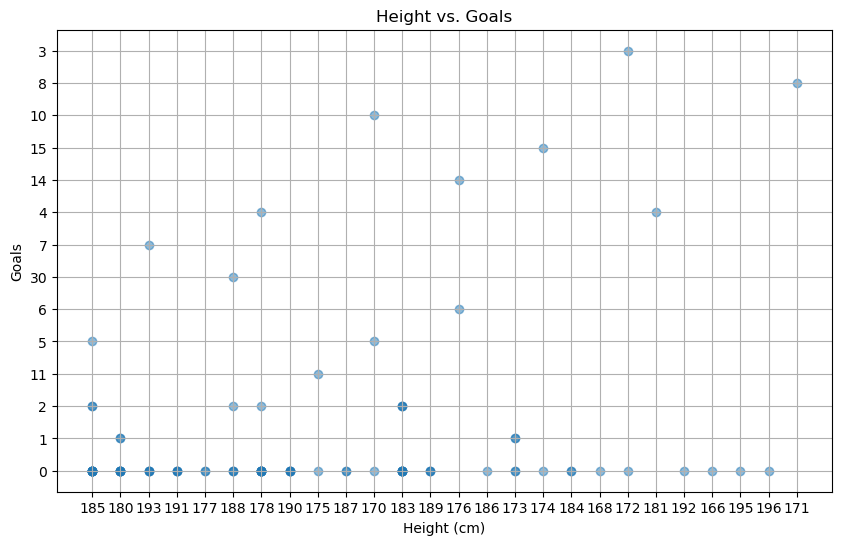

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Select 100 data points at random
random_data = height_df.sample(n=100)

random_data['Height'] = random_data['Height'].astype(str)
random_data['Goals'] = random_data['Goals'].astype(str)

print(random_data.dtypes)

# Create a scatter plot of "Height" against "Goals"
plt.figure(figsize=(10, 6))
plt.scatter(random_data['Height'], random_data['Goals'], alpha=0.5)
plt.title('Height vs. Goals')
plt.xlabel('Height (cm)')
plt.ylabel('Goals')
plt.grid(True)
plt.show()

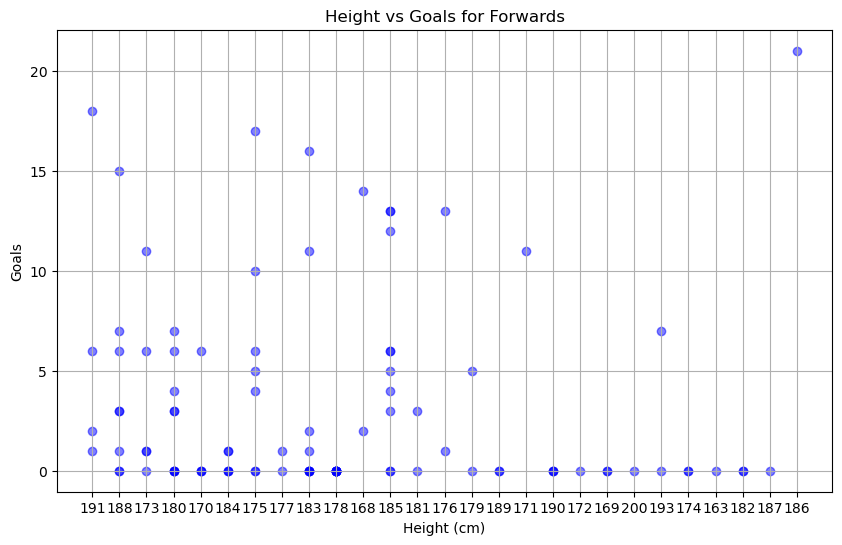

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter the DataFrame to select 100 data points where Position is 'Striker'
strikers_df = height_df[height_df['Position'] == 'Forward'].sample(n=100, random_state=42)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(strikers_df['Height'], strikers_df['Goals'], color='blue', alpha=0.5)
plt.title('Height vs Goals for Forwards')
plt.xlabel('Height (cm)')
plt.ylabel('Goals')
plt.grid(True)
plt.show()

In [14]:
#code to calculate age from DoB column

#converts DoB column to datetime format
merged_df['DoB'] = pd.to_datetime(merged_df['DoB'])

#cretaes a new column with the season start year
merged_df['Season Start Year'] = merged_df['Season'].str[:4]

#calculates age
merged_df['Age'] = ((merged_df['Season Start Year'].astype(int) +1) - merged_df['DoB'].dt.year)

print(merged_df)

           Player Name    Position Nationality                 Club Height  \
0          Gary Ablett    Defender     England              Everton    188   
1           Tony Adams    Defender     England              Arsenal    191   
2          Steve Agnew  Midfielder     England     Blackburn Rovers    178   
3          Derek Allan    Defender    Scotland          Southampton    183   
4        Bradley Allen     Forward     England  Queens Park Rangers    170   
...                ...         ...         ...                  ...    ...   
3180      Ben Woodburn  Midfielder       Wales            Liverpool    174   
3181   Freddie Woodman  Goalkeeper     England  Bournemouth  (Loan)    188   
3182  Joe Wormleighton    Defender     England       Leicester City    NaN   
3183       Joe Worrall    Defender     England    Nottingham Forest    193   
3184      James Wright  Goalkeeper     England          Aston Villa    NaN   

            DoB Goals   Season Season.1 Season Start Year  Age 

C:\Users\matts\AppData\Local\Temp\ipykernel_7844\3576067048.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['DoB'] = pd.to_datetime(merged_df['DoB'])


C:\Users\matts\AppData\Local\Temp\ipykernel_7844\1591756937.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_season_groups = merged_df.groupby(['Age Bin', 'Season'])


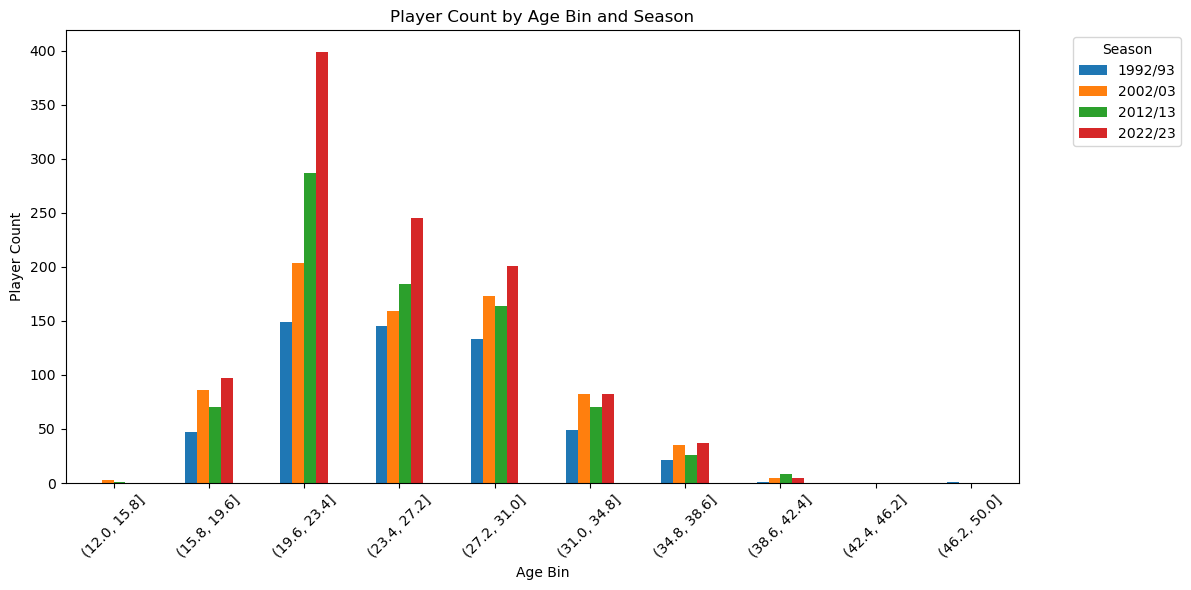

In [15]:
#creates age bins
bins = np.linspace(merged_df['Age'].min(), merged_df['Age'].max(), 11)

#group data by age bins and seasons
merged_df['Age Bin'] = pd.cut(merged_df['Age'], bins=bins)
age_season_groups = merged_df.groupby(['Age Bin', 'Season'])

#calculate size of each bin
age_season_counts = age_season_groups.size().unstack()

#plot
age_season_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Player Count by Age Bin and Season')
plt.xlabel('Age Bin')
plt.ylabel('Player Count')
plt.xticks(rotation=45)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

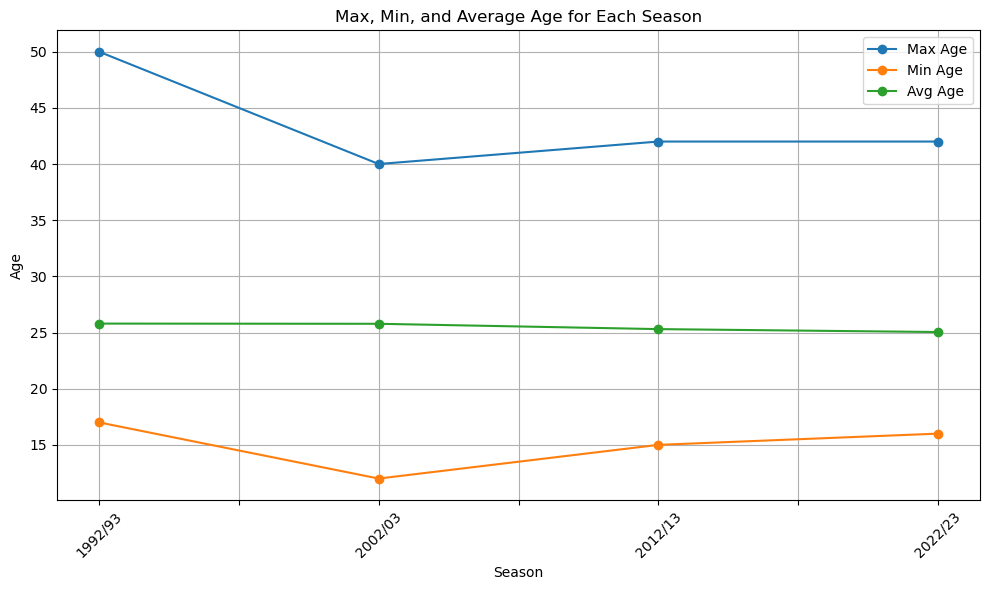

In [16]:
#group df by season
season_groups = merged_df.groupby('Season')

#calculate max, min, and average age for each season
max_age = season_groups['Age'].max()
min_age = season_groups['Age'].min()
avg_age = season_groups['Age'].mean()

#plot
plt.figure(figsize=(10, 6))
max_age.plot(label='Max Age', marker='o')
min_age.plot(label='Min Age', marker='o')
avg_age.plot(label='Avg Age', marker='o')

#add labels, titles, ticks etc.
plt.title('Max, Min, and Average Age for Each Season')
plt.xlabel('Season')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()